# Class 11: Part 1

NYU Tandon C4SUE @avigailvantu , April 2021

## Working and displaying line and polygon data 
GeoPandas can produce maps pretty quickly, with just a few lines of code. Today will look further into some data types and learn how not only create a map, but also how to control some aspects. In the first section of this class we will look into line data of bike lanes, polygon data (senior safe zones), and point data 

In [27]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

Today we will see a few additional ways to work with spatial data on Jupyter. Last session we touched upon transforming data from dataframe into geodataframe. This is a cool way to map and visualize x,y data that comes in CSV files. Today we will load shpfiles into Jupyter. Because this is a geo based data it let's us visualize the data right away.

# NYC Bike Lanes 



In [28]:
#here I am loading the bike lanes data
#note that I am loading all files in the folder, hence I do not specify the data extension (.shp)
bike_lane = gpd.read_file('Bicycle Routes')

In [29]:
bike_lane.head()

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,segmentid,shape_leng,street,tf2facilit,tf_facilit,tostreet,geometry
0,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,53.0,131.771990,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24993 40.50088, -74.24969 40.5..."
1,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,57.0,268.689582,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24916 40.49872, -74.24935 40.4..."
2,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,59.0,420.193253,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24935 40.49944, -74.24969 40.5..."
3,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,61.0,238.242198,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25185 40.50281, -74.25177 40.5..."
4,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,64.0,646.293832,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25133 40.50229, -74.24993 40.5..."


Note that we already have a geometry column in the data. This means we can visualize the data right away ----> 

<AxesSubplot:>

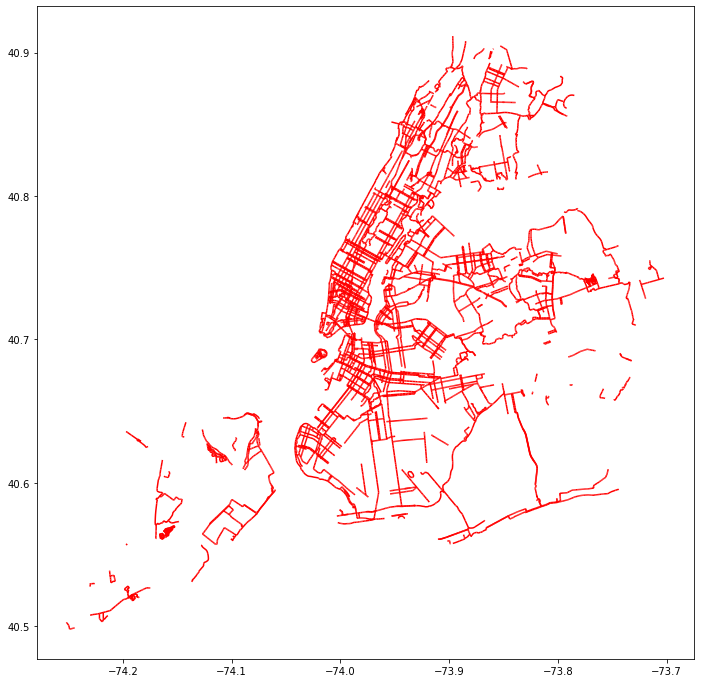

In [30]:
bike_lane.plot( color='red',legend=True,figsize=(12, 12),markersize=0.1)

Now let's check out more functionalities.. 

In [31]:
#knowing what the columns in the data
bike_lane.columns

Index(['allclasses', 'bikedir', 'boro', 'comments', 'facilitycl', 'fromstreet',
       'ft2facilit', 'ft_facilit', 'lanecount', 'onoffst', 'segmentid',
       'shape_leng', 'street', 'tf2facilit', 'tf_facilit', 'tostreet',
       'geometry'],
      dtype='object')

I now want to filter the data and display it by the boro column. Note the boro columns contains numeric values (1-5), and not the actual name. Let's check it out: 

In [32]:
bike_lane['boro']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
19870    2.0
19871    2.0
19872    2.0
19873    2.0
19874    2.0
Name: boro, Length: 19875, dtype: float64

# Working with the NYC boro codes:

These are the numeric code--borough names. 

1. Manhattan (New York County)
2. Bronx (Bronx County)
3. Brooklyn (Kings County)
4. Queens (Queens County)
5. Staten Island (Richmond County)

In [33]:
#let's filter to only have Manhattan's bike lanes: 

bike_lane[bike_lane['boro']==1].head(3)

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,segmentid,shape_leng,street,tf2facilit,tf_facilit,tostreet,geometry
31,"II,III",2,1.0,limited access road (parks),II,W 79 ST,None,Curbside,2.0,OFF,2416.0,440.773031,79 ST NORTH ACCESS RAMP,None,Sharrows,HUDSON RIVER GREENWAY 79TH ST LINK,"LINESTRING (-74.19697 40.55756, -74.19602 40.5..."
549,I,2,1.0,None,I,GOVERNORS ISLAND GREENWAY,None,Greenway,2.0,OFF,17971.0,249.343238,GOVERNORS ISLAND GREENWAY,None,Greenway,GOVERNORS ISLAND GREENWAY,"LINESTRING (-74.02114 40.68514, -74.02191 40.6..."
550,I,2,1.0,None,I,GOVERNORS ISLAND GREENWAY,None,Greenway,2.0,OFF,17975.0,291.379429,GOVERNORS ISLAND GREENWAY,None,Greenway,GOVERNORS ISLAND GREENWAY,"LINESTRING (-74.02024 40.68555, -74.02114 40.6..."


In [34]:
len(bike_lane[bike_lane['boro']==1])

5396

We get only bike lanes that are inside Manhattan, there are a total of 5266 of them!

# Filter data to plot one borough at time

This feature is extremely useful to narrow down the map scope, but it requires having categories in the data to work with. Luckily for us the bike lane data comes with the boro code so this is all pretty straight forward. If this was not imidiatly available to us we could have merge with the borough layer for example (we will see how to marge geo data frames in the 2dn section of this class). 

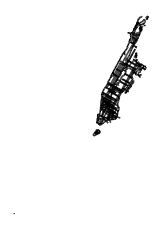

In [35]:
#now let's plot them: 

bike_lane[bike_lane['boro']==1].plot(color='k')
plt.axis('off')
plt.show()

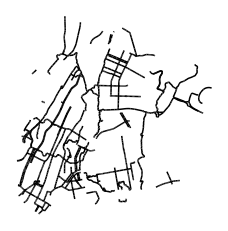

In [36]:
#plot the Bronx bike lanes

bike_lane[bike_lane['boro']==2].plot(color='k')
plt.axis('off')
plt.show()

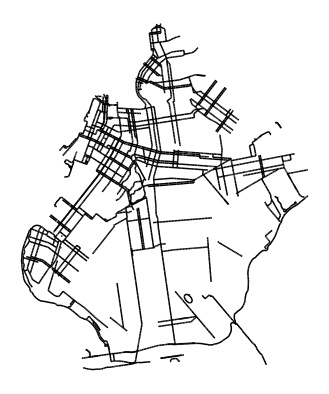

In [37]:
#plot bike lanes for Brooklyn only 
bike_lane[bike_lane['boro']==3].plot(figsize=(8, 7),color='k')
plt.axis('off')
plt.show()

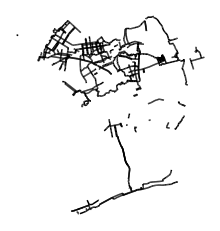

In [38]:
#plot Queens only: 
bike_lane[bike_lane['boro']==4].plot(color='k')
plt.axis('off')
plt.show()

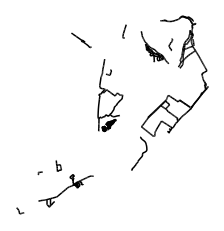

In [39]:
#and finaly, plot Staten Island 
bike_lane[bike_lane['boro']==5].plot(color='k')
plt.axis('off')
plt.show()

In [40]:
# count number of bike lanes per boro :

print ('Manhattan # of bike lanes',len(bike_lane[bike_lane['boro']==1]))
print ('Staten Island # of bike lanes',len(bike_lane[bike_lane['boro']==5]))
print ('Bronx # of bike lanes',len(bike_lane[bike_lane['boro']==2]))
print ('Brooklyn # of bike lanes',len(bike_lane[bike_lane['boro']==3]))
print ('Queens # of bike lanes',len(bike_lane[bike_lane['boro']==4]))
print ('Staten Island # of bike lanes',len(bike_lane[bike_lane['boro']==5]))

Manhattan # of bike lanes 5396
Staten Island # of bike lanes 1092
Bronx # of bike lanes 2977
Brooklyn # of bike lanes 5696
Queens # of bike lanes 4714
Staten Island # of bike lanes 1092


## Types of bikelanes

As we will see soon ,the NYC bike lane data can get us the specifics of the each bike lane type. Let's look into two columns to learn more about the types of bike lanes: 
1. ft_facilit
2. tf_facilit

In [41]:

bike_lane.ft_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', 'Signed Route', None, 'Bike-Friendly Parking',
       'Buffered Conventional', 'Boardwalk', 'Buffered', 'Ped Plaza',
       'Dirt Trail', 'Link', '<Null>', 'Dirt Path'], dtype=object)

In [42]:

bike_lane.tf_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', None, 'Signed Route', 'Buffered Conventional',
       'Bike-Friendly Parking', 'Boardwalk', 'Sharrows/Standard',
       'Buffered', 'Curbside/Sharrows', 'Standard/Sharrows', 'Ped Plaza',
       'Sharrows/Protected Path', 'Dirt Trail', 'Velodrome', 'Link',
       'Dirt Path'], dtype=object)

They both seem to have mostly the same categories, when ft_facilit seem to have slightly simpler. But the tf_facilit gives us more intresting details that's why I chose it. 

Let's plot the data so that it is diplayed only 

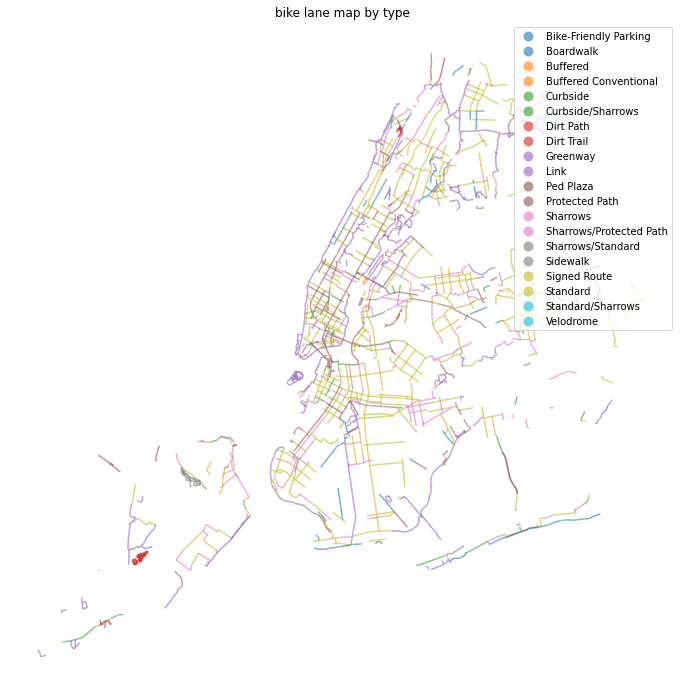

In [43]:
ax = bike_lane.plot(column='tf_facilit',legend=True,figsize=(12, 20), alpha = 0.6,markersize=2)

plt.title('bike lane map by type')

plt.axis('off')


plt.show()

In [44]:
#let's see the number of rows per unique value of bike path type: 
bike_lane['tf_facilit'].value_counts()

Standard                   5227
Sharrows                   2571
Greenway                   2362
Protected Path             2088
Curbside                    634
Bike-Friendly Parking       529
Signed Route                432
Sidewalk                    347
Boardwalk                   159
Dirt Trail                   64
Buffered Conventional        41
Buffered                     37
Dirt Path                    36
Ped Plaza                    13
Link                          8
Velodrome                     3
Curbside/Sharrows             2
Sharrows/Standard             2
Standard/Sharrows             1
Sharrows/Protected Path       1
Name: tf_facilit, dtype: int64

In [45]:
# plot only MN by bike lane type:

bike_laneMN = bike_lane[bike_lane['boro']==1]

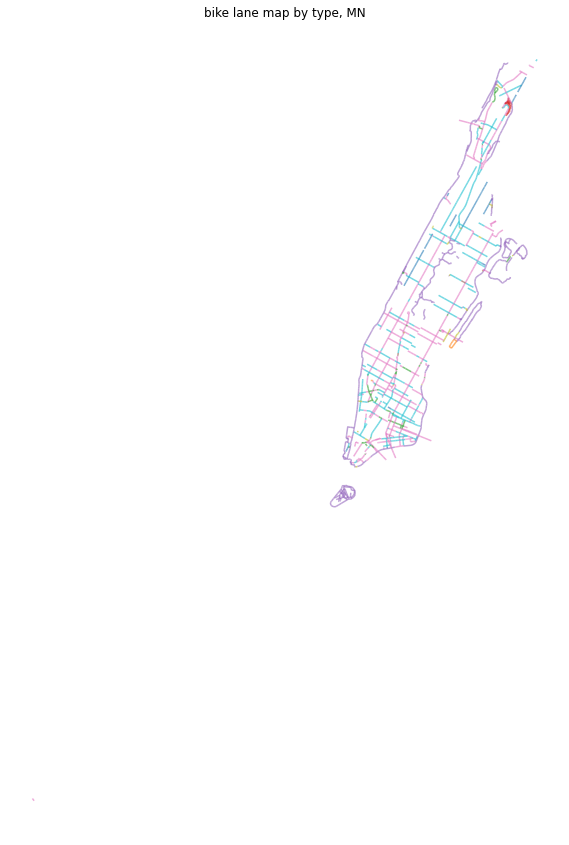

In [46]:
labels = bike_laneMN.tf_facilit

ax = bike_laneMN.plot(column='tf_facilit', figsize=(10, 15), alpha = 0.6,markersize=2)
#ax.legend()
plt.title('bike lane map by type, MN')

plt.axis('off')
#plt.xlim(500000,588000)
#plt.ylim(4200000,4520000)
plt.show()

## Ploygon data: Senior Priority Zones: 



In [47]:
safe_streeets = gpd.read_file("VZV_Safe Streets for Seniors")

In [48]:
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
safe_streeets.head()

,name,shape_area,shape_leng,geometry
0,Astoria,8.306479e+06,14763.582784,"POLYGON ((-73.91899 40.76577, -73.91978 40.766..."
1,Bath Beach,1.187964e+07,15515.138903,"POLYGON ((-73.99154 40.59039, -73.99161 40.590..."
2,Bay Ridge,1.475626e+07,21468.007297,"POLYGON ((-74.03382 40.61459, -74.03454 40.614..."
3,Bedford Stuyvesant,4.613148e+07,27438.609830,"POLYGON ((-73.92864 40.69324, -73.92804 40.692..."
4,Bensonhurst,2.399853e+07,23653.773218,"POLYGON ((-73.99015 40.59971, -73.99086 40.600..."


In [50]:
#what are the polygons area? 
safe_streeets.geometry.area.head()

<ipython-input-50-932e6bb44835>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  safe_streeets.geometry.area.head()


0    0.000082
1    0.000117
2    0.000146
3    0.000457
4    0.000237
dtype: float64

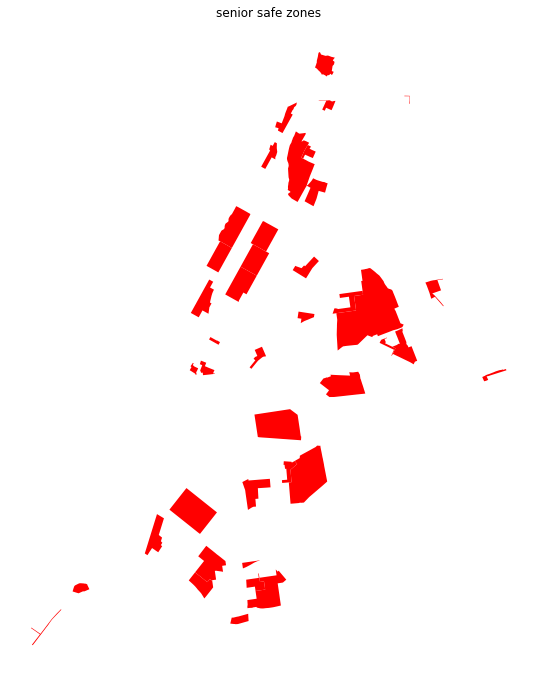

In [51]:

safe_streeets.plot(color='red',figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('senior safe zones')

plt.show()

## Add a point layer: senior centers 

Here we will add a layer of senior centers that the DOT works with. We will try to overlay one with the senior safe zone to see how many senior centers fall inside the safety zones. 

In [52]:
#load the shapfile
senior_centers = gpd.read_file("VZV_Senior Centers")

In [53]:
#what are the columns in the data
senior_centers.columns

Index(['activity', 'event_date', 'lat', 'long', 'site_serve', 'geometry'], dtype='object')

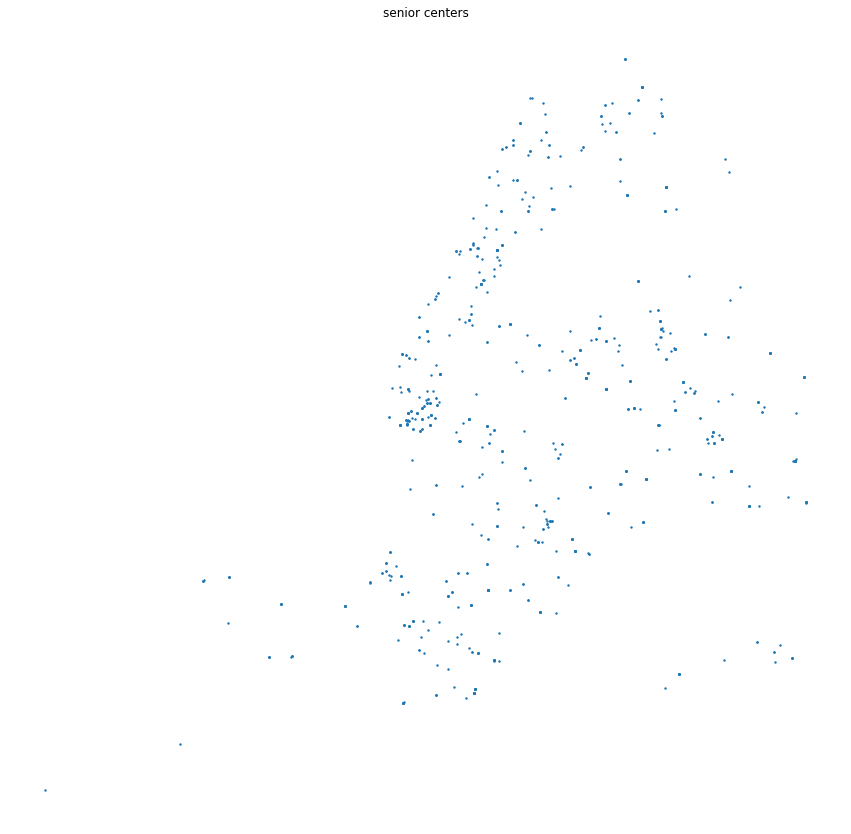

In [54]:
senior_centers.plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('senior centers')
plt.show()

# Overlay multiple layers on Pyplot: 

Can we intersect safe zones and senior centers?

In [55]:
#what is the projection of senior safe zones?
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
#what is the projection of senior centers?
senior_centers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both look the same so we should be good to go with overlaying both. 

(-74.26504011945596, -73.70740009178658, 40.510574673913105, 40.91661409471997)

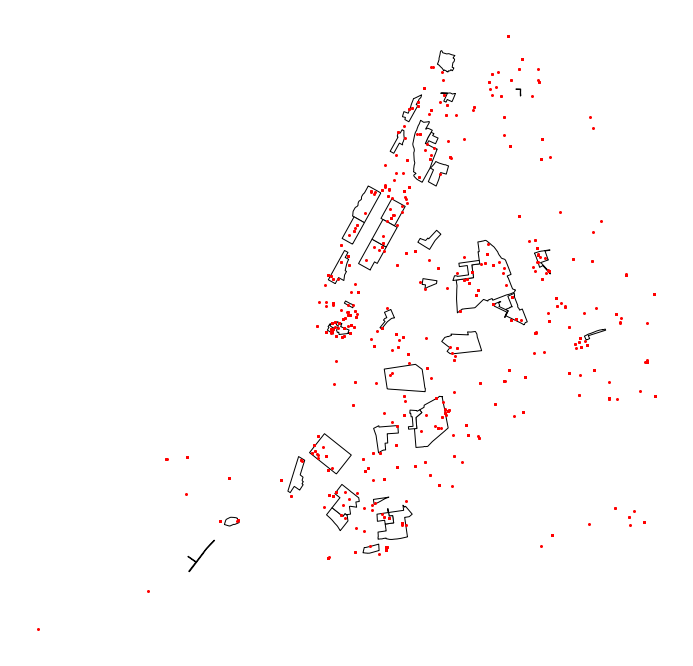

In [57]:
#first we need to set up the layer that is going to be used 
base = safe_streeets.plot(color='white',legend=True,figsize=(20, 12), edgecolor='black')
#now add the senior centers layer: 
senior_centers.plot(ax=base, marker='o', color='red', markersize=4);


plt.axis('off')

## Bonus: Add map background

In [59]:
import contextily as ctx

In [60]:
bike_lane = bike_lane.to_crs(epsg=3857)

In [61]:
# from:https://share.cocalc.com/share/56cef78b3fda5e0338c2da71b222e6b275a9193e/contextily.ipynb?viewer=share 

In [62]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    
    ax.axis((xmin, xmax, ymin, ymax))
    
    

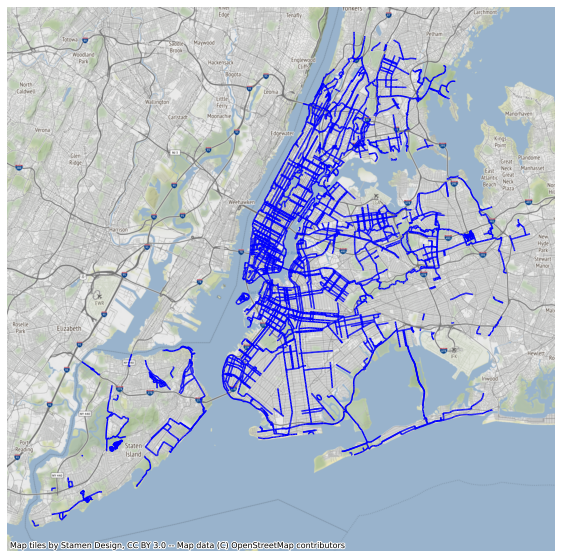

In [63]:
ax = bike_lane.plot(figsize=(10, 10), edgecolor='b')
ctx.add_basemap(ax, zoom=12)
ax.set_axis_off()

## Class assignment

Using any publilcy available data, display the proximity of bike lanes to two important city amenities of your choice. Choose only two boroughs from the city 5 boroughs to display both bike lanes and the amenities for only those two boroughs. Compare the proximity between both selected boroughs. 

What are some of the conclusions that come to mind when thinking about how bike lanes are distributed across the city boroughs? Given your analysis, are there any areas that seem to be lacking bike lanes? If so, where?









In [253]:
parks = gpd.read_file('Parks Properties')
len(parks)

2015

In [258]:
parks.head(25)

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19990222000000.00000,20.907,None,R,PARK,20100106000000.00000,503,51,R-03,Seaside Wildlife Nature Park,...,122,False,Seaside Wildlife Nature Park,Neighborhood Park,Neighborhood Park,http://www.nycgovparks.org/parks/R145/,11,Yes,10308,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 ..."
1,19530514000000.00000,0.061,None,Q,PARK,20090423000000.00000,401,22,Q-01,Strippoli Square,...,114,False,Strippoli Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q355/,14,No,11377,"POLYGON ((-73.90749 40.75709, -73.90768 40.757..."
2,19400528000000.00000,1.130,150 34 STREET,B,PARK,20100106000000.00000,307,38,B-07,D'Eemic Playground,...,72,False,D'Emic Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B210B/,7,No,11232,"POLYGON ((-74.00468 40.65584, -74.00492 40.655..."
3,20100517000000.00000,2.160,201/125 BOLTON AVENUE,X,PARK,20100106000000.00000,209,18,X-09,Harding Park,...,43,False,Harding Park,Neighborhood Plgd,Neighborhood Park,http://www.nycgovparks.org/parks/X262/,15,No,10473,"MULTIPOLYGON (((-73.85640 40.80925, -73.85676 ..."
4,19550427000000.00000,1.104,4522 CARPENTER AVENUE,X,PARK,20100106000000.00000,212,11,X-12,Wakefield Playground,...,47,False,Wakefield Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/X188/,16,No,10470,"MULTIPOLYGON (((-73.85416 40.90187, -73.85455 ..."
5,19160308000000.00000,0.004,None,B,PARK,20100106000000.00000,304,34,B-04,Freedom Triangle,...,83,False,Freedom Triangle,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/B037/,7,No,11221,"POLYGON ((-73.93182 40.69727, -73.93170 40.697..."
6,19150303000000.00000,13.543,None,Q,PARK,20090423000000.00000,410,32,Q-10,Addabbo Park,...,106,False,Tudor Park,Large Park,Community Park,http://www.nycgovparks.org/parks/Q094/,8,No,11417,"MULTIPOLYGON (((-73.85623 40.67450, -73.85590 ..."
7,19460501000000.00000,0.300,67 COLUMBIA HEIGHTS,B,PARK,20100106000000.00000,302,33,B-02,Harry Chapin Playground,...,84,False,Harry Chapin Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B223H/,7,No,11201,"POLYGON ((-73.99480 40.70052, -73.99483 40.700..."
8,19490615000000.00000,1.253,255 ADELPHI STREET,B,PARK,20100106000000.00000,302,35,B-02,Albert J. Parham Playground (PS 20),...,88,False,Albert J. Parham Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/B253/,8,No,11205,"POLYGON ((-73.97064 40.68998, -73.97110 40.689..."
9,19970723000000.00000,0.809,700 MARCY AVENUE,B,PARK,20100106000000.00000,303,36,B-03,Magnolia Tree Earth Center,...,79,False,Hattie Carthan Community Garden,Greenthumb,Garden,http://www.nycgovparks.org/parks/B400/,8,No,11216,"POLYGON ((-73.94878 40.68951, -73.94883 40.689..."


In [269]:
m_parks = parks[parks['borough'] == "M"]

In [256]:
bx_parks = parks[parks['borough'] == "X"]

In [257]:
bx_parks.head(3)

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
3,20100517000000.00000,2.160,201/125 BOLTON AVENUE,X,PARK,20100106000000.00000,209,18,X-09,Harding Park,...,43,False,Harding Park,Neighborhood Plgd,Neighborhood Park,http://www.nycgovparks.org/parks/X262/,15,No,10473,"MULTIPOLYGON (((-73.85640 40.80925, -73.85676 ..."
4,19550427000000.00000,1.104,4522 CARPENTER AVENUE,X,PARK,20100106000000.00000,212,11,X-12,Wakefield Playground,...,47,False,Wakefield Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/X188/,16,No,10470,"MULTIPOLYGON (((-73.85416 40.90187, -73.85455 ..."
11,18990628000000.00000,3.306,2100 CEDAR AVENUE,X,PARK,20100106000000.00000,205,14,X-05,University Woods,...,46,False,University Woods,Neighborhood Park,Neighborhood Park,http://www.nycgovparks.org/parks/X051/,"15, 13",No,10468,"POLYGON ((-73.91595 40.85827, -73.91600 40.858..."


In [259]:
print(bx_parks.crs)

epsg:4326


<AxesSubplot:>

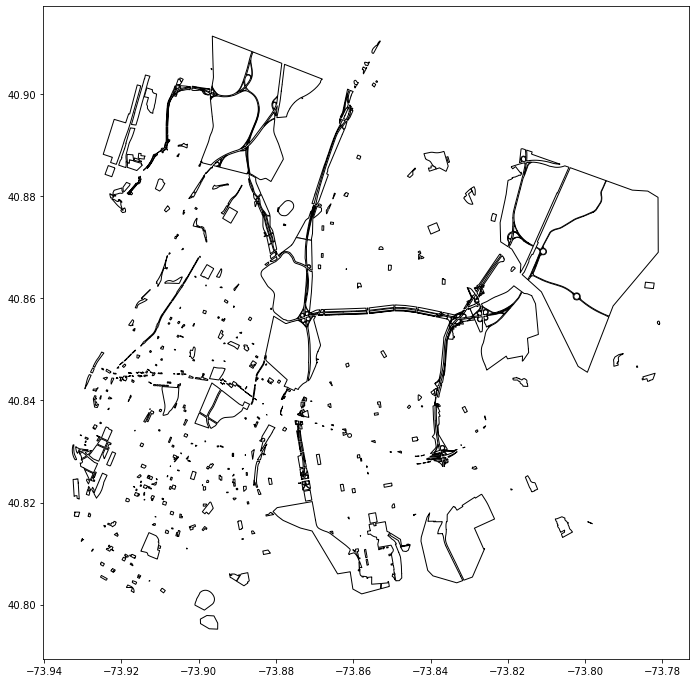

In [260]:
bx_parks.plot(color='white',legend=True,figsize=(20, 12), edgecolor='black')

In [64]:
hospitals = gpd.read_file('hospital')

In [69]:
hospitals.head(3)

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,POINT (1008872.000 246596.000)
1,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,POINT (1011044.000 242204.000)
2,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,POINT (1027505.000 248287.000)


<AxesSubplot:>

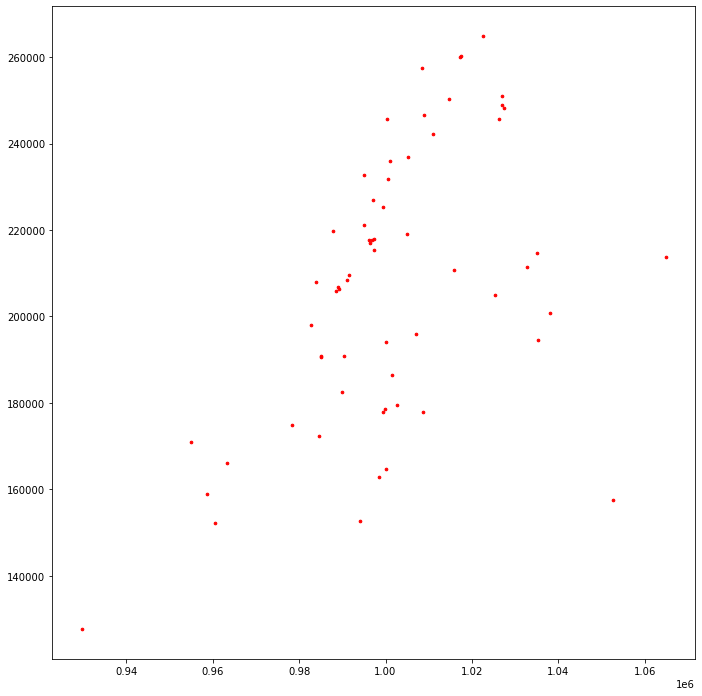

In [73]:
hospitals.plot( color='red',legend=True,figsize=(12, 12),markersize=7)

In [74]:
hospitals.columns

Index(['id', 'name', 'address', 'zip', 'factype', 'facname', 'capacity',
       'capname', 'bcode', 'xcoord', 'ycoord', 'geometry'],
      dtype='object')

In [80]:
hospitals['zip']

0     10457
1     10456
2     10461
3     10461
4     10451
      ...  
57    10310
58    10304
59    10304
60    10305
61    10309
Name: zip, Length: 62, dtype: object

In [216]:
bx_hos = hospitals[hospitals['zip'] == "10453"]
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10457"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10460"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10458"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10467"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10468"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10451"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10452"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10456"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10454"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10455"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10459"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10474"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10463"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10471"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10466"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10469"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10470"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10475"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10461"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10462"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10464"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10465"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10472"], ignore_index=True)
bx_hos = bx_hos.append(hospitals[hospitals['zip'] == "10473"], ignore_index=True)

In [219]:
bx_hos.head(11)

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,POINT (1008872.000 246596.000)
1,317000014H1176,SBH HEALTH SYSTEM,4422 Third Ave,10457,3102,Hospital,422,Beds,36005,1014577.0,250205.0,POINT (1014577.000 250205.000)
2,317000006H1169,MONTEFIORE MEDICAL CENTER - HENRY & LUCY MOSES...,111 E 210 St,10467,3102,Hospital,779,Beds,36005,1017448.0,260210.0,POINT (1017448.000 260210.000)
3,317000024H1186,NORTH CENTRAL BRONX HOSPITAL,3424 Kossuth Ave,10467,3102,Hospital,213,Beds,36005,1017133.0,260085.0,POINT (1017133.000 260085.000)
4,317000008H1172,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 E 149 St,10451,3102,Hospital,362,Beds,36005,1005154.0,236853.0,POINT (1005154.000 236853.000)
5,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,POINT (1011044.000 242204.000)
6,317000006H1168,MONTEFIORE MEDICAL CENTER-WAKEFIELD HOSPITAL,600 E 233 St,10466,3102,Hospital,309,Beds,36005,1022618.0,264841.0,POINT (1022618.000 264841.000)
7,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,POINT (1027505.000 248287.000)
8,317000002H1165,JACOBI MEDICAL CENTER,1400 Pelham Pkwy,10461,3102,Hospital,457,Beds,36005,1027042.0,251065.0,POINT (1027042.000 251065.000)
9,317000006H3058,MONTEFIORE MED CENTER - JACK D WEILER HOSP OF ...,1825 Eastchester Rd,10461,3102,Hospital,424,Beds,36005,1026825.0,248938.0,POINT (1026825.000 248938.000)


In [218]:
len(bx_hos)

11

In [226]:
print(bx_hos.crs)

epsg:2263


In [221]:
bx_bike = bike_lane[bike_lane['boro']==2]

In [225]:
print(bx_bike.crs)

epsg:3857


In [261]:
bx_bike = bx_bike.to_crs({'init': 'epsg:4326'})

C:\Users\jimmy\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [262]:
bx_hos = bx_hos.to_crs({'init': 'epsg:4326'})

(-73.94078266888873,
 -73.77302452705172,
 40.789395910945466,
 40.917227920279174)

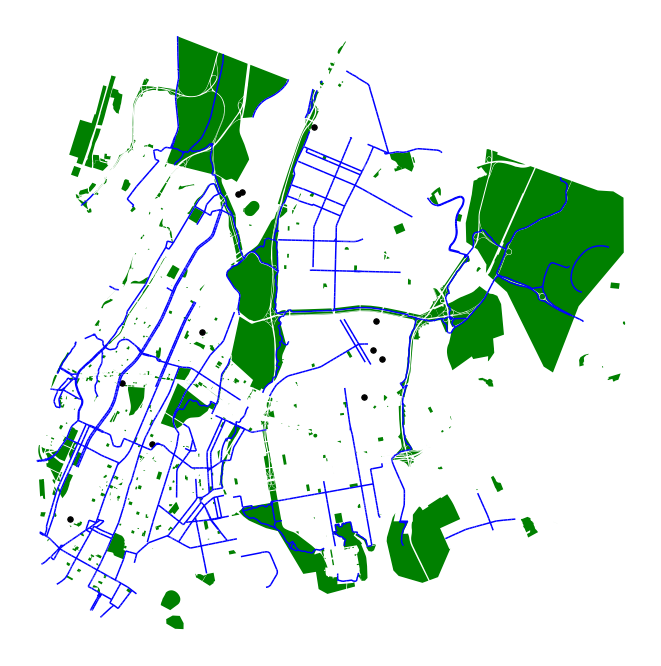

In [267]:
base1 = bx_parks.plot(color='green',legend=True,figsize=(20, 12))
base = bx_bike.plot(ax = base1, color='blue')
bx_hos.plot(ax = base, marker='o', color='black', markersize=30);
plt.axis('off')

In [237]:
mZip = [10027, 10030, 10037, 10039,10001, 10011, 10018, 10019, 10020, 10036, 10029, 10035, 10010, 10016, 10017, 10022, 10012, 10013, 10014, 10004, 10005, 10006, 10007, 10038, 10280, 10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025, 10031, 10032, 10033, 10034, 10040]
for i in range(len(mZip)):
    mZip[i] = str(mZip[i])

In [238]:
m_hos = hospitals[hospitals['zip'] == "10026"]
for i in range(len(mZip)):
    m_hos = m_hos.append(hospitals[hospitals['zip'] == mZip[i]], ignore_index=True)

In [239]:
m_hos.head()

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,geometry
0,317002009H1445,HARLEM HOSPITAL CENTER,506 Lenox Ave,10037,3102,Hospital,282,Beds,36061,1000923.0,235890.0,POINT (1000923.000 235890.000)
1,317002017H9700,LENOX HILL HEALTHPLEX,30 Seventh Ave,10011,3102,Hospital,2,Beds,36061,984008.0,208046.0,POINT (984008.000 208046.000)
2,317002032H1466,MOUNT SINAI ROOSEVELT,1000 Tenth Ave,10019,3102,Hospital,514,Beds,36061,987882.0,219698.0,POINT (987882.000 219698.000)
3,317002021H1454,METROPOLITAN HOSPITAL CENTER,1901 First Ave,10029,3102,Hospital,338,Beds,36061,999492.0,225298.0,POINT (999492.000 225298.000)
4,317002024H1456,MOUNT SINAI HOSPITAL,1 Gustave L Levy Pl,10029,3102,Hospital,1171,Beds,36061,997191.0,227053.0,POINT (997191.000 227053.000)


In [240]:
len(m_hos)

21

In [241]:
m_bike = bike_lane[bike_lane['boro']==1]

In [242]:
print(bx_bike.crs)

epsg:3857


In [243]:
print(m_hos.crs)

epsg:2263


In [270]:
m_bike = m_bike.to_crs({'init': 'epsg:4326'})

C:\Users\jimmy\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [271]:
m_hos = m_hos.to_crs({'init': 'epsg:4326'})

(-74.21140565958801, -73.89392474645611, 40.54051864652306, 40.89427853791493)

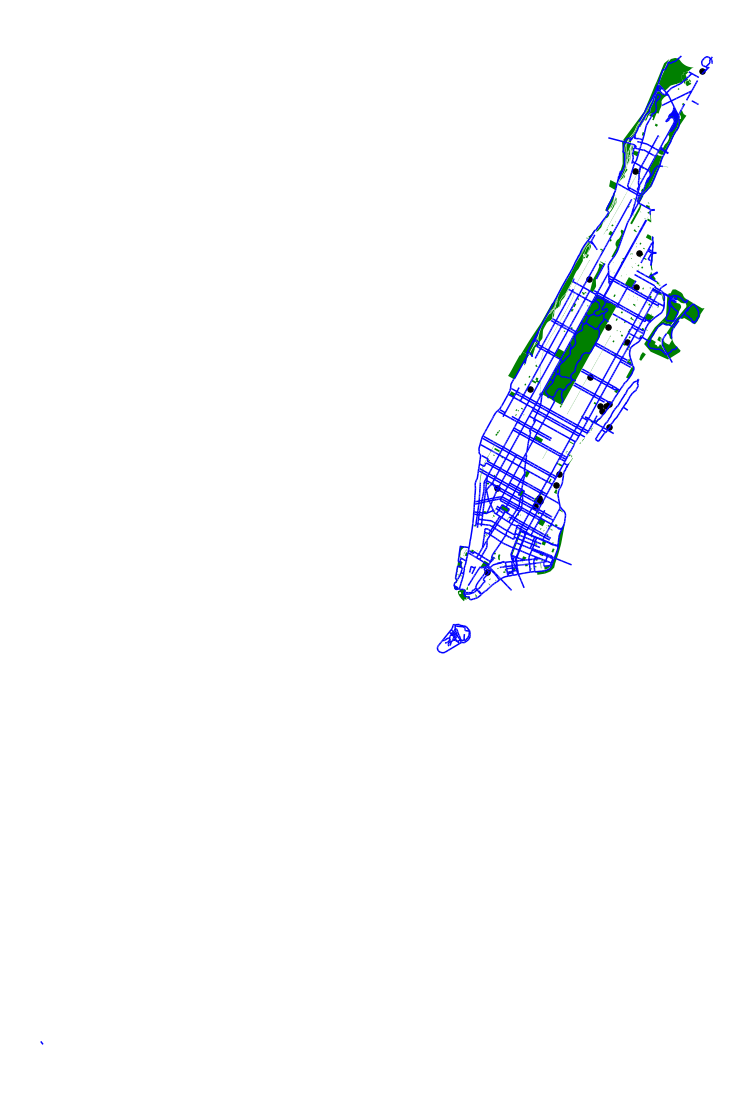

In [273]:
base1 = m_parks.plot(color='green',legend=True,figsize=(20, 20))
base = m_bike.plot(ax = base1, color='blue')
m_hos.plot(ax = base, marker='o', color='black', markersize=30);
plt.axis('off')


The two publicly available data that I chose to use is United Hospital Fund neighborhoods from 2009 and Park Properties from NYC OpenData. The proximity of the parks in the Bronx and Manhattan are both accessible from the bike lanes however, in the Bronx there seems to be more parks. The Hospitals in Manhattan seem to be more reach able from the bike lanes and each region has a good number of hospitals to goto. While in the Bronx Map the hospitals seem more spreadout and would take longer to reach certain hosptials. Despite the differnces in distance bikes lanes seem to be put in placed very well with the area and you are able to get to one place to another just through bike. The bronx area does seem to be lacking a lot of bike lanes in most of the neighborhood unlike Manhattan I can not see a bike lane through my area in the Bronx. 